# GLCM texture analysis of concrete crack image

In [1]:
# Import libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops

In [2]:
imgpath = r"C:\Users\shubh\Documents\steel_detection\concrete_crack_detection\Positive"
imgs = ["00001.jpg", "00002.jpg", "00003.jpg", "00004.jpg", "00005.jpg", "00006.jpg"]
imgfiles = [os.path.join(imgpath, img) for img in imgs]
imgfiles

['C:\\Users\\shubh\\Documents\\steel_detection\\concrete_crack_detection\\Positive\\00001.jpg',
 'C:\\Users\\shubh\\Documents\\steel_detection\\concrete_crack_detection\\Positive\\00002.jpg',
 'C:\\Users\\shubh\\Documents\\steel_detection\\concrete_crack_detection\\Positive\\00003.jpg',
 'C:\\Users\\shubh\\Documents\\steel_detection\\concrete_crack_detection\\Positive\\00004.jpg',
 'C:\\Users\\shubh\\Documents\\steel_detection\\concrete_crack_detection\\Positive\\00005.jpg',
 'C:\\Users\\shubh\\Documents\\steel_detection\\concrete_crack_detection\\Positive\\00006.jpg']

In [13]:
# Function to calculate texture properties of a GLCM like correlation, dissimalrity and homogeneity
def GLCM(imgfiles, block=30):
    
    for imgfile in imgfiles:
        dissim = []
        correl = []
        homogen = []
        
        imgtitle = "Image_" + os.path.basename(imgfile).split(".")[0]
        
        img = cv2.imread(imgfile, 0)
        (row,col) = img.shape
        
        for r in range(0,row-block,block):
            dissim_1d = []
            correl_1d = []
            homogen_1d = []
            for c in range(0,col-block,block):
                section = img[r:r+block,c:c+block]
                glcm = greycomatrix(section, distances=[5], angles=[0], levels=256,
                            symmetric=True, normed=True)
                
                dissim_1d.append(greycoprops(glcm, 'correlation')[0, 0])
                correl_1d.append(greycoprops(glcm, 'dissimilarity')[0, 0])
                homogen_1d.append(greycoprops(glcm, 'homogeneity')[0, 0])
        
            dissim.append(dissim_1d)
            correl.append(correl_1d)
            homogen.append(homogen_1d)
        
        _, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(8,4))
        
        ax0.axis('off')
        ax0.set_title(imgtitle)
        ax0.imshow(img, cmap='gray')
        
        ax1.axis('off')
        ax1.set_title("Correlation")
        ax1.imshow(np.array(correl), cmap='gray')
        
        ax2.axis('off')
        ax2.set_title("Dissimilarity")
        ax2.imshow(np.array(dissim), cmap='gray')
        
        ax3.axis('off')
        ax3.set_title("Homogeneity")
        ax3.imshow(np.array(homogen), cmap='gray')
        
        plt.show()
        
    return dissim, correl, homogen

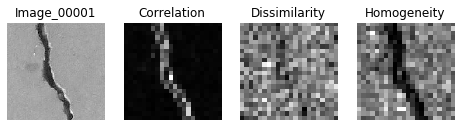

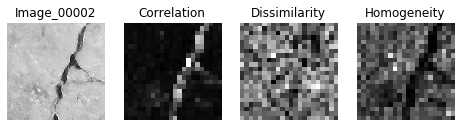

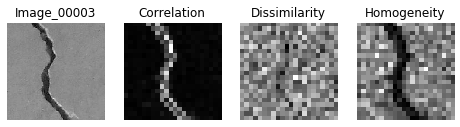

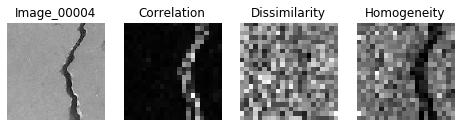

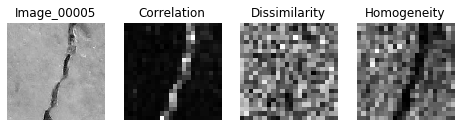

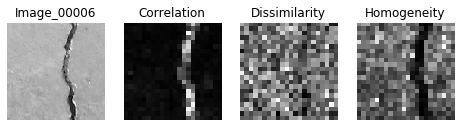

In [14]:
# Calculating texture properties on 10X10 window of image
block = 10
dissim, correl, homogen = GLCM(imgfiles, block)